In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

### K MEANS

In [4]:
df = pd.read_csv("/Users/victoriaromerorodriguez/Desktop/BOOTCAMP/MACHINE LEARNING/CLUSTERING/KMEANS/ckd_limpio.csv")

In [5]:
df

,Unnamed: 0,ane,sg,ba,htn,hemo,pcv,cad,appet,rc,rbc,sc,bgr,su,bp,pe,bu,sod,class
0,0,0.0,0.75,0.0,1.0,0.836735,0.777778,0.0,0.0,0.525424,1.0,0.010582,0.211538,0.0,0.230769,0.0,0.088575,0.848580,0.0
1,1,0.0,0.75,0.0,0.0,0.557823,0.644444,0.0,0.0,0.559322,1.0,0.005291,0.195869,0.0,0.000000,0.0,0.042362,0.835962,0.0
2,2,1.0,0.25,0.0,0.0,0.442177,0.488889,0.0,1.0,0.316384,1.0,0.018519,0.856838,0.6,0.230769,0.0,0.132221,0.804416,0.0
3,3,1.0,0.00,0.0,1.0,0.551020,0.511111,0.0,1.0,0.305085,1.0,0.044974,0.202991,0.0,0.153846,1.0,0.139923,0.671924,0.0
4,4,0.0,0.25,0.0,0.0,0.578231,0.577778,0.0,0.0,0.423729,1.0,0.013228,0.179487,0.0,0.230769,0.0,0.062901,0.842271,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.0,0.75,0.0,0.0,0.857143,0.844444,0.0,0.0,0.474576,1.0,0.001323,0.252137,0.0,0.230769,0.0,0.121951,0.917981,1.0
396,396,0.0,1.00,0.0,0.0,0.911565,1.000000,0.0,0.0,0.694915,1.0,0.010582,0.113248,0.0,0.153846,0.0,0.075738,0.861199,1.0
397,397,0.0,0.75,0.0,0.0,0.863946,0.888889,0.0,0.0,0.559322,1.0,0.002646,0.166667,0.0,0.230769,0.0,0.062901,0.835962,1.0
398,398,0.0,1.00,0.0,0.0,0.755102,0.933333,0.0,0.0,0.644068,1.0,0.007937,0.196581,0.0,0.076923,0.0,0.124519,0.823344,1.0


In [6]:
del df["Unnamed: 0"]
del df["class"]

In [7]:
df

,ane,sg,ba,htn,hemo,pcv,cad,appet,rc,rbc,sc,bgr,su,bp,pe,bu,sod
0,0.0,0.75,0.0,1.0,0.836735,0.777778,0.0,0.0,0.525424,1.0,0.010582,0.211538,0.0,0.230769,0.0,0.088575,0.848580
1,0.0,0.75,0.0,0.0,0.557823,0.644444,0.0,0.0,0.559322,1.0,0.005291,0.195869,0.0,0.000000,0.0,0.042362,0.835962
2,1.0,0.25,0.0,0.0,0.442177,0.488889,0.0,1.0,0.316384,1.0,0.018519,0.856838,0.6,0.230769,0.0,0.132221,0.804416
3,1.0,0.00,0.0,1.0,0.551020,0.511111,0.0,1.0,0.305085,1.0,0.044974,0.202991,0.0,0.153846,1.0,0.139923,0.671924
4,0.0,0.25,0.0,0.0,0.578231,0.577778,0.0,0.0,0.423729,1.0,0.013228,0.179487,0.0,0.230769,0.0,0.062901,0.842271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.75,0.0,0.0,0.857143,0.844444,0.0,0.0,0.474576,1.0,0.001323,0.252137,0.0,0.230769,0.0,0.121951,0.917981
396,0.0,1.00,0.0,0.0,0.911565,1.000000,0.0,0.0,0.694915,1.0,0.010582,0.113248,0.0,0.153846,0.0,0.075738,0.861199
397,0.0,0.75,0.0,0.0,0.863946,0.888889,0.0,0.0,0.559322,1.0,0.002646,0.166667,0.0,0.230769,0.0,0.062901,0.835962
398,0.0,1.00,0.0,0.0,0.755102,0.933333,0.0,0.0,0.644068,1.0,0.007937,0.196581,0.0,0.076923,0.0,0.124519,0.823344


In [8]:
#Aplicamos el kmeans y buscamos K
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(df)     
    inercias.append(kmeans.inertia_) 
inercias

[475.6036797665261,
 331.80701059511244,
 284.8019645527437,
 258.48037770471495,
 238.7778996503803,
 220.5499185780616,
 206.33721454128784,
 190.0000418118515,
 180.53770844692988,
 171.77954710682658]

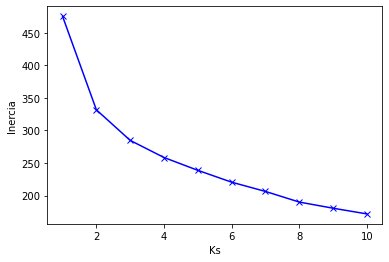

In [9]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [10]:
#Aplicación del algoritmo kmeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
kmeans.labels_

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
#Encontramos los centroides de los 4 clusters 
kmeans.cluster_centers_

array([[2.50000000e-02, 7.04513889e-01, 3.33333333e-02, 2.22044605e-16,
        7.39172336e-01, 7.58981481e-01, 1.66666667e-02, 6.25000000e-02,
        5.08804143e-01, 9.29166667e-01, 1.81639477e-02, 2.18028846e-01,
        4.13888889e-02, 1.76923077e-01, 4.58333333e-02, 1.00937099e-01,
        8.54705573e-01],
       [3.37500000e-01, 4.60937500e-01, 8.75000000e-02, 9.18750000e-01,
        5.01360544e-01, 5.27037037e-01, 1.87500000e-01, 4.18750000e-01,
        3.32909605e-01, 8.12500000e-01, 6.11841380e-02, 3.47987892e-01,
        1.72083333e-01, 2.40384615e-01, 4.06250000e-01, 2.08669234e-01,
        8.15910883e-01]])

In [12]:
df_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
df_centroides

,ane,sg,ba,htn,hemo,pcv,cad,appet,rc,rbc,sc,bgr,su,bp,pe,bu,sod
0,0.0250,0.704514,0.033333,2.220446e-16,0.739172,0.758981,0.016667,0.06250,0.508804,0.929167,0.018164,0.218029,0.041389,0.176923,0.045833,0.100937,0.854706
1,0.3375,0.460938,0.087500,9.187500e-01,0.501361,0.527037,0.187500,0.41875,0.332910,0.812500,0.061184,0.347988,0.172083,0.240385,0.406250,0.208669,0.815911


- Los clusters 0 y 1 tienen bastante diferencia en cuanto a: ane, htn, cad, appet, su, pe

In [13]:
df["clase"] = kmeans.labels_
df

,ane,sg,ba,htn,hemo,pcv,cad,appet,rc,rbc,sc,bgr,su,bp,pe,bu,sod,clase
0,0.0,0.75,0.0,1.0,0.836735,0.777778,0.0,0.0,0.525424,1.0,0.010582,0.211538,0.0,0.230769,0.0,0.088575,0.848580,1
1,0.0,0.75,0.0,0.0,0.557823,0.644444,0.0,0.0,0.559322,1.0,0.005291,0.195869,0.0,0.000000,0.0,0.042362,0.835962,0
2,1.0,0.25,0.0,0.0,0.442177,0.488889,0.0,1.0,0.316384,1.0,0.018519,0.856838,0.6,0.230769,0.0,0.132221,0.804416,1
3,1.0,0.00,0.0,1.0,0.551020,0.511111,0.0,1.0,0.305085,1.0,0.044974,0.202991,0.0,0.153846,1.0,0.139923,0.671924,1
4,0.0,0.25,0.0,0.0,0.578231,0.577778,0.0,0.0,0.423729,1.0,0.013228,0.179487,0.0,0.230769,0.0,0.062901,0.842271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.75,0.0,0.0,0.857143,0.844444,0.0,0.0,0.474576,1.0,0.001323,0.252137,0.0,0.230769,0.0,0.121951,0.917981,0
396,0.0,1.00,0.0,0.0,0.911565,1.000000,0.0,0.0,0.694915,1.0,0.010582,0.113248,0.0,0.153846,0.0,0.075738,0.861199,0
397,0.0,0.75,0.0,0.0,0.863946,0.888889,0.0,0.0,0.559322,1.0,0.002646,0.166667,0.0,0.230769,0.0,0.062901,0.835962,0
398,0.0,1.00,0.0,0.0,0.755102,0.933333,0.0,0.0,0.644068,1.0,0.007937,0.196581,0.0,0.076923,0.0,0.124519,0.823344,0


In [14]:
df_bueno = pd.read_excel("/Users/victoriaromerorodriguez/Desktop/BOOTCAMP/MACHINE LEARNING/chronickidney.xlsx")

In [15]:
df_bueno

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [16]:
df_bueno.replace("?", np.nan, inplace = True)

In [17]:
lista_numericas = df_bueno._get_numeric_data().columns

In [18]:
df_num = df_bueno[lista_numericas]
df_num

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,5.9


In [19]:
list_num = ["pcv", "wc"]

In [20]:
df_num= pd.concat([df_num, df_bueno[list_num]], sort = False, axis = 1)
df_num.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,5.2,44,7800
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,NaN,38,6000
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,NaN,31,7500
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,3.9,32,6700
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,4.6,35,7300


In [21]:
del df_num["al"]

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)                 #busca el valor de los vecinos cercanos
df_num_imp = imputer.fit_transform(df_num)
df_num_imp

array([[4.80000000e+01, 8.00000000e+01, 1.02000000e+00, ...,
        5.20000000e+00, 4.40000000e+01, 7.80000000e+03],
       [7.00000000e+00, 5.00000000e+01, 1.02000000e+00, ...,
        5.40000000e+00, 3.80000000e+01, 6.00000000e+03],
       [6.20000000e+01, 8.00000000e+01, 1.01000000e+00, ...,
        3.96666667e+00, 3.10000000e+01, 7.50000000e+03],
       ...,
       [1.20000000e+01, 8.00000000e+01, 1.02000000e+00, ...,
        5.40000000e+00, 4.90000000e+01, 6.60000000e+03],
       [1.70000000e+01, 6.00000000e+01, 1.02500000e+00, ...,
        5.90000000e+00, 5.10000000e+01, 7.20000000e+03],
       [5.80000000e+01, 8.00000000e+01, 1.02500000e+00, ...,
        6.10000000e+00, 5.30000000e+01, 6.80000000e+03]])

In [23]:
df_num = pd.DataFrame(df_num_imp, columns = df_num.columns)
df_num.head(10)

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,48.0,80.000000,1.020,0.0,121.000000,36.0,1.2,139.000000,4.533333,15.4,5.200000,44.0,7800.000000
1,7.0,50.000000,1.020,0.0,113.666667,18.0,0.8,137.000000,4.000000,11.3,5.400000,38.0,6000.000000
2,62.0,80.000000,1.010,3.0,423.000000,53.0,1.8,132.000000,4.666667,9.6,3.966667,31.0,7500.000000
3,48.0,70.000000,1.005,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,3.900000,32.0,6700.000000
4,51.0,80.000000,1.010,0.0,106.000000,26.0,1.4,138.000000,4.233333,11.6,4.600000,35.0,7300.000000
5,60.0,90.000000,1.015,0.0,74.000000,25.0,1.1,142.000000,3.200000,12.2,4.400000,39.0,7800.000000
6,68.0,70.000000,1.010,0.0,100.000000,54.0,24.0,104.000000,4.000000,12.4,4.533333,36.0,11266.666667
7,24.0,66.666667,1.015,4.0,410.000000,31.0,1.1,135.000000,3.700000,12.4,5.000000,44.0,6900.000000
8,52.0,100.000000,1.015,0.0,138.000000,60.0,1.9,135.666667,5.300000,10.8,4.000000,33.0,9600.000000
9,53.0,90.000000,1.020,0.0,70.000000,107.0,7.2,114.000000,3.700000,9.5,3.700000,29.0,12100.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler


objeto_normalizador = MinMaxScaler()

objeto_normalizador.fit(df_num)

df_final_ar = objeto_normalizador.transform(df_num)

df_final = pd.DataFrame(df_final_ar, columns = df_num.columns)

df_final.head()

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,0.522727,0.230769,0.75,0.0,0.211538,0.088575,0.010582,0.848580,0.045693,0.836735,0.525424,0.777778,0.231405
1,0.056818,0.000000,0.75,0.0,0.195869,0.042362,0.005291,0.835962,0.033708,0.557823,0.559322,0.644444,0.157025
2,0.681818,0.230769,0.25,0.6,0.856838,0.132221,0.018519,0.804416,0.048689,0.442177,0.316384,0.488889,0.219008
3,0.522727,0.153846,0.00,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.305085,0.511111,0.185950
4,0.556818,0.230769,0.25,0.0,0.179487,0.062901,0.013228,0.842271,0.038951,0.578231,0.423729,0.577778,0.210744


In [25]:
df_final.shape

(400, 13)

In [26]:
#Aplicamos el kmeans y buscamos K
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(df_final)     
    inercias.append(kmeans.inertia_) 
inercias

[133.12391615627902,
 87.94834157158684,
 73.16647009304802,
 65.87595783064043,
 61.17566005097917,
 57.203051559502015,
 53.745797667385254,
 50.67369144886369,
 49.01460391421105,
 47.276305895468376]

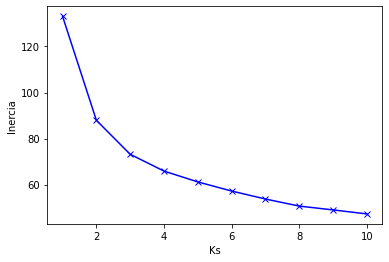

In [27]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [28]:
#Aplicación del algoritmo kmeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_final)
kmeans.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
#Encontramos los centroides de los 4 clusters 
kmeans.cluster_centers_

array([[0.62610723, 0.23418803, 0.3991453 , 0.18324786, 0.34850245,
        0.2036593 , 0.05768439, 0.81859311, 0.05315663, 0.50193616,
        0.33423149, 0.52687559, 0.28998375],
       [0.49573171, 0.17198249, 0.80487805, 0.00845528, 0.19535126,
        0.08730935, 0.01414806, 0.85877767, 0.0400475 , 0.77922681,
        0.53757751, 0.79873532, 0.23361553]])

In [30]:
df_final_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_final.columns])
df_final_centroides

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,0.626107,0.234188,0.399145,0.183248,0.348502,0.203659,0.057684,0.818593,0.053157,0.501936,0.334231,0.526876,0.289984
1,0.495732,0.171982,0.804878,0.008455,0.195351,0.087309,0.014148,0.858778,0.040048,0.779227,0.537578,0.798735,0.233616


In [31]:
#Tranformo el df_centroides de la forma escalada a la forma en la que se mueven los valores de cada columna 
df_final_centroides = objeto_normalizador.inverse_transform(df_final_centroides)
df_final_centroides =  pd.DataFrame(data = df_final_centroides, columns = [df_final.columns])
df_final_centroides

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,57.097436,80.444444,1.012983,0.916239,185.099145,80.825299,4.760940,134.247009,4.865470,10.478462,4.071966,32.709402,9217.606838
1,45.624390,72.357724,1.021098,0.042276,113.424390,35.506992,1.469593,140.616260,4.282114,14.554634,5.271707,44.943089,7853.495935


- Los clusters 0 y 1 tienen bastante diferencia en cuanto a: su, bu, sg, sc

## Otro caso (con k = 3)

In [32]:
df_final_1 = df_final.copy()

In [33]:
df_final_1["clase"] = kmeans.labels_
df_final_1

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc,clase
0,0.522727,0.230769,0.75,0.0,0.211538,0.088575,0.010582,0.848580,0.045693,0.836735,0.525424,0.777778,0.231405,1
1,0.056818,0.000000,0.75,0.0,0.195869,0.042362,0.005291,0.835962,0.033708,0.557823,0.559322,0.644444,0.157025,1
2,0.681818,0.230769,0.25,0.6,0.856838,0.132221,0.018519,0.804416,0.048689,0.442177,0.316384,0.488889,0.219008,0
3,0.522727,0.153846,0.00,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.305085,0.511111,0.185950,0
4,0.556818,0.230769,0.25,0.0,0.179487,0.062901,0.013228,0.842271,0.038951,0.578231,0.423729,0.577778,0.210744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.474576,0.844444,0.185950,1
396,0.454545,0.153846,1.00,0.0,0.113248,0.075738,0.010582,0.861199,0.022472,0.911565,0.694915,1.000000,0.231405,1
397,0.113636,0.230769,0.75,0.0,0.166667,0.062901,0.002646,0.835962,0.042697,0.863946,0.559322,0.888889,0.181818,1
398,0.170455,0.076923,1.00,0.0,0.196581,0.124519,0.007937,0.823344,0.053933,0.755102,0.644068,0.933333,0.206612,1


In [34]:
#Aplicación del algoritmo kmeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_final)
kmeans.labels_

array([0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
df_final_3_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_final.columns])
df_final_3_centroides

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,0.499470,0.165936,0.823402,0.004836,0.193426,0.084903,0.013609,0.859717,0.040321,0.786648,0.539475,0.804375,0.235045
1,0.597382,0.228822,0.401371,0.045992,0.276606,0.204421,0.056176,0.816895,0.044181,0.489035,0.336051,0.519409,0.276485
2,0.672078,0.260073,0.418367,0.597279,0.550410,0.182189,0.054008,0.830211,0.077811,0.582211,0.370691,0.595314,0.314078


In [36]:
#Encontramos los centroides de los 4 clusters 
kmeans.cluster_centers_

array([[0.49947009, 0.16593596, 0.82340242, 0.00483592, 0.19342589,
        0.0849027 , 0.01360903, 0.8597168 , 0.04032136, 0.78664834,
        0.53947484, 0.80437536, 0.23504475],
       [0.59738205, 0.22882181, 0.40137131, 0.04599156, 0.27660572,
        0.2044209 , 0.05617647, 0.81689494, 0.04418053, 0.48903528,
        0.33605092, 0.51940928, 0.27648464],
       [0.67207792, 0.26007326, 0.41836735, 0.59727891, 0.55040991,
        0.18218892, 0.05400785, 0.83021095, 0.0778109 , 0.58221112,
        0.37069065, 0.59531368, 0.3140777 ]])

In [37]:
df_final_3_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_final.columns])
df_final_3_centroides

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,0.499470,0.165936,0.823402,0.004836,0.193426,0.084903,0.013609,0.859717,0.040321,0.786648,0.539475,0.804375,0.235045
1,0.597382,0.228822,0.401371,0.045992,0.276606,0.204421,0.056176,0.816895,0.044181,0.489035,0.336051,0.519409,0.276485
2,0.672078,0.260073,0.418367,0.597279,0.550410,0.182189,0.054008,0.830211,0.077811,0.582211,0.370691,0.595314,0.314078


In [38]:
#Tranformo el df_centroides de la forma escalada a la forma en la que se mueven los valores de cada columna 
df_final_3_centroides = objeto_normalizador.inverse_transform(df_final_3_centroides)
df_final_3_centroides =  pd.DataFrame(data = df_final_3_centroides, columns = [df_final.columns])
df_final_3_centroides

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,45.953368,71.571675,1.021468,0.024180,112.523316,34.569603,1.428843,140.765112,4.294301,14.663731,5.282902,45.196891,7888.082902
1,54.569620,79.746835,1.013027,0.229958,151.451477,81.121941,4.646941,133.977848,4.466034,10.288819,4.082700,32.373418,8890.928270
2,61.142857,83.809524,1.013367,2.986395,279.591837,72.462585,4.482993,136.088435,5.962585,11.658503,4.287075,35.789116,9800.680272


- El cluster 0 tiene un valor de 'su' mucho mayor que los clusters 1 y 2
- El cluster 2 tiene un valor de 'sg' mucho mayor que los clusters 0 y 1
- El cluster 1 tiene valores muy similares al cluster 0 excepto en la categoría 'su'

### JERARQUICO

In [39]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering  

In [44]:
df_final

,age,bp,sg,su,bgr,bu,sc,sod,pot,hemo,rc,pcv,wc
0,0.522727,0.230769,0.75,0.0,0.211538,0.088575,0.010582,0.848580,0.045693,0.836735,0.525424,0.777778,0.231405
1,0.056818,0.000000,0.75,0.0,0.195869,0.042362,0.005291,0.835962,0.033708,0.557823,0.559322,0.644444,0.157025
2,0.681818,0.230769,0.25,0.6,0.856838,0.132221,0.018519,0.804416,0.048689,0.442177,0.316384,0.488889,0.219008
3,0.522727,0.153846,0.00,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.305085,0.511111,0.185950
4,0.556818,0.230769,0.25,0.0,0.179487,0.062901,0.013228,0.842271,0.038951,0.578231,0.423729,0.577778,0.210744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.474576,0.844444,0.185950
396,0.454545,0.153846,1.00,0.0,0.113248,0.075738,0.010582,0.861199,0.022472,0.911565,0.694915,1.000000,0.231405
397,0.113636,0.230769,0.75,0.0,0.166667,0.062901,0.002646,0.835962,0.042697,0.863946,0.559322,0.888889,0.181818
398,0.170455,0.076923,1.00,0.0,0.196581,0.124519,0.007937,0.823344,0.053933,0.755102,0.644068,0.933333,0.206612


In [45]:
X= np.asarray(df_final)

In [46]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X, X) 
print(dist_matrix, dist_matrix.shape)

[[0.         0.61260811 1.15699272 ... 0.4323809  0.507981   0.38002996]
 [0.61260811 0.         1.26517212 ... 0.46035195 0.46975771 0.82083451]
 [1.15699272 1.26517212 0.         ... 1.34667942 1.43078308 1.36909023]
 ...
 [0.4323809  0.46035195 1.34667942 ... 0.         0.34061823 0.60306627]
 [0.507981   0.46975771 1.43078308 ... 0.34061823 0.         0.51621523]
 [0.38002996 0.82083451 1.36909023 ... 0.60306627 0.51621523 0.        ]] (400, 400)


In [47]:
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import ClusterWarning

from warnings import simplefilter
simplefilter("ignore", ClusterWarning) 
Z = hierarchy.linkage(dist_matrix, "complete")


In [48]:
Z

array([[2.59000000e+02, 3.16000000e+02, 3.47222852e-01, 2.00000000e+00],
       [8.00000000e+00, 5.10000000e+01, 3.82331960e-01, 2.00000000e+00],
       [2.61000000e+02, 2.75000000e+02, 4.16762671e-01, 2.00000000e+00],
       ...,
       [7.92000000e+02, 7.95000000e+02, 1.13656961e+01, 3.33000000e+02],
       [7.91000000e+02, 7.94000000e+02, 1.42785995e+01, 6.70000000e+01],
       [7.96000000e+02, 7.97000000e+02, 2.00876872e+01, 4.00000000e+02]])

In [49]:
from scipy.cluster.hierarchy import leaves_list, fcluster

leaves_list(Z)

array([266, 228, 317, 344, 384, 335, 321, 377, 307, 394, 273, 330, 258,
       310, 324, 358, 300, 326, 261, 275, 395, 262, 392, 265,   0,  89,
       263, 342, 303, 325, 290, 388, 293, 306, 121, 278, 309, 370, 286,
       375, 285, 283, 320, 338, 313, 380, 385, 116,  16, 280, 105, 214,
        95, 161, 205, 165, 243, 294, 369,  66, 221, 211, 233, 295,  91,
       268, 117, 209, 365, 257, 352, 298, 224, 260, 264, 353, 296, 289,
       305, 302, 259, 316, 166, 336, 339, 274, 282, 348, 319, 328,  30,
       351, 367, 318, 376, 379, 399, 363, 381, 374, 383, 359, 312, 299,
       372, 129, 157, 350, 364, 378, 341, 256, 357, 247, 331, 373, 150,
       251, 371, 387, 398, 287, 314, 304, 271, 362, 253, 281, 288, 366,
       267, 308, 315, 250, 252, 323, 272, 291, 297, 254, 311, 382, 396,
       284, 356, 343, 389, 277, 390, 337, 393, 301, 347, 386, 333, 397,
       346, 292, 355, 361, 269, 279, 391, 255, 349, 276, 345, 270, 334,
       332, 368, 340, 360, 327, 329, 354,  67,  86,  90, 208,  3

In [51]:
from collections import Counter

In [54]:
for i in range(13,23):
    labels = fcluster(Z, i, "distance")
    print(Counter(labels))

Counter({1: 333, 3: 58, 2: 9})
Counter({1: 333, 3: 58, 2: 9})
Counter({1: 333, 2: 67})
Counter({1: 333, 2: 67})
Counter({1: 333, 2: 67})
Counter({1: 333, 2: 67})
Counter({1: 333, 2: 67})
Counter({1: 333, 2: 67})
Counter({1: 400})
Counter({1: 400})


In [59]:
labels = fcluster(Z, 15, "distance") #fcluster nos da las categorias que el considera
labels

array([1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

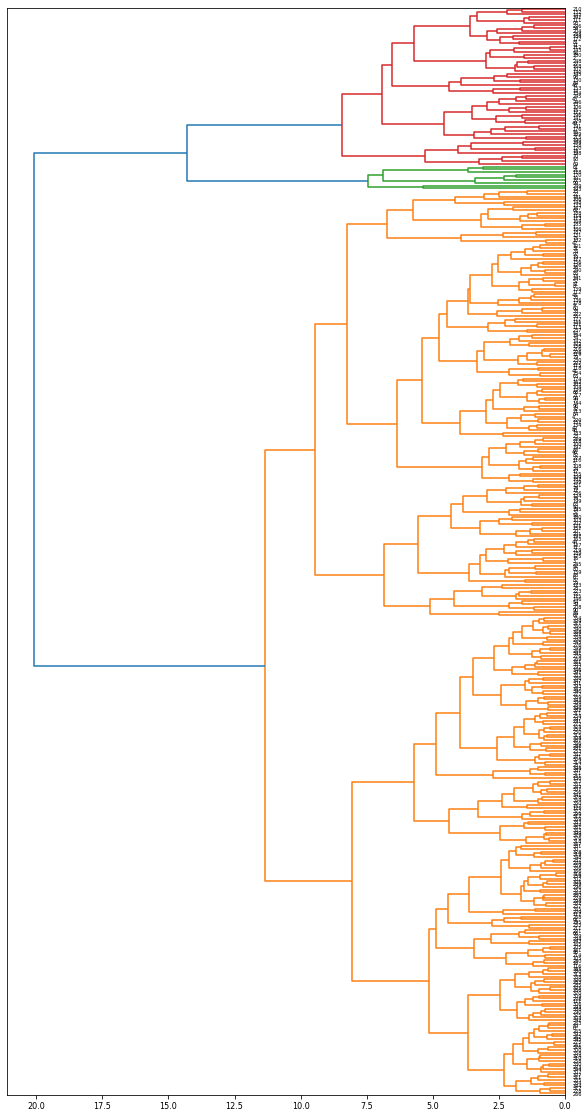

In [60]:
plt.figure(figsize = (10, 20))

dendro = hierarchy.dendrogram(Z, orientation = "left")

plt.tick_params(axis = "x", labelsize = 8)

### AGLOMERATIVE

In [87]:
from sklearn.cluster import AgglomerativeClustering 

In [66]:
l_linkages= ["ward", "complete", "average", "single"]

for opcion in l_linkages:
    agglom = AgglomerativeClustering(n_clusters = 2, linkage = opcion) #n_clusters es el numero de clases 
    agglom.fit(X)
    print(opcion)
    print(agglom.labels_)
    
    print("----------------------------")

ward
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
----------------------------
complete
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1

In [101]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = "ward") #n_clusters es el numero de clases 
agglom.fit(X) 

AgglomerativeClustering()

In [102]:
yhat1= agglom.labels_

In [83]:
df = pd.DataFrame()
df["hemo"]= X[:,9] #Primera columna del iris
df["bu"] = X[:,5] #Segunda columna del iris
df["Clase"] = agglom.labels_

In [84]:
df

,hemo,bu,Clase
0,0.836735,0.088575,1
1,0.557823,0.042362,0
2,0.442177,0.132221,0
3,0.551020,0.139923,0
4,0.578231,0.062901,0
...,...,...,...
395,0.857143,0.121951,1
396,0.911565,0.075738,1
397,0.863946,0.062901,1
398,0.755102,0.124519,1


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt 

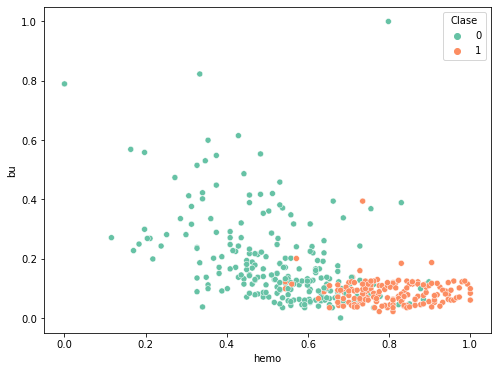

In [86]:
plt.figure(figsize = (8, 6))

sns.scatterplot(x = df["hemo"], y = df["bu"],
                hue = df["Clase"], palette = "Set2")
plt.show()

<AxesSubplot:>

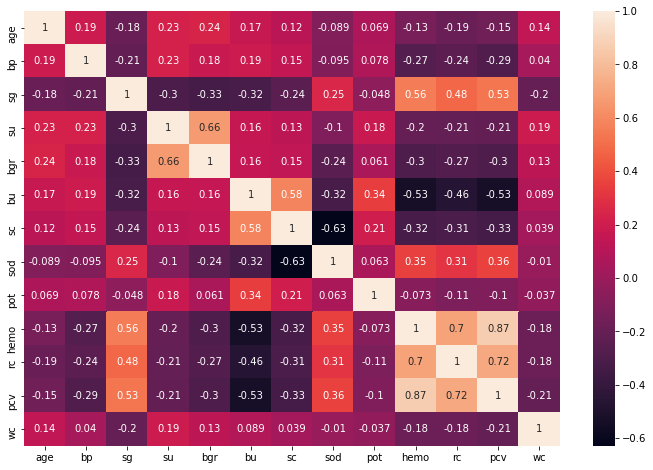

In [79]:
fig, ax= plt.subplots(figsize= (12,8))
sns.heatmap(df_final.corr(), annot= True )

***Con 3 clusters***

In [88]:
l_linkages= ["ward", "complete", "average", "single"]

for opcion in l_linkages:
    agglom = AgglomerativeClustering(n_clusters = 3, linkage = opcion) #n_clusters es el numero de clases 
    agglom.fit(X)
    print(opcion)
    print(agglom.labels_)
    
    print("----------------------------")

ward
[1 0 2 0 0 0 0 2 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 2 0 0 0 0 1 2 0 2 2 0 2 0
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 1 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 2 0 0 0 0 0 1 0 0 2 1 0 2 0 2 0 0 2 1 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 2 2
 1 0 1 2 0 2 2 1 0 1 2 0 0 0 0 0 0 1 1 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1 2 0 2 0 0 0 0 0 0 0 0 2
 0 2 1 2 2 0 1 0 0 0 0 0 0 0 2 0 2 0 0 0 2 1 2 0 0 1 2 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
----------------------------
complete
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0

In [89]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = "ward") #n_clusters es el numero de clases 
agglom.fit(X) 

AgglomerativeClustering(n_clusters=3)

In [100]:
yhat2= agglom.labels_

In [91]:
df = pd.DataFrame()
df["hemo"]= X[:,9] #Primera columna del iris
df["bu"] = X[:,5] #Segunda columna del iris
df["Clase"] = agglom.labels_

In [92]:
df

,hemo,bu,Clase
0,0.836735,0.088575,1
1,0.557823,0.042362,0
2,0.442177,0.132221,2
3,0.551020,0.139923,0
4,0.578231,0.062901,0
...,...,...,...
395,0.857143,0.121951,1
396,0.911565,0.075738,1
397,0.863946,0.062901,1
398,0.755102,0.124519,1


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt 

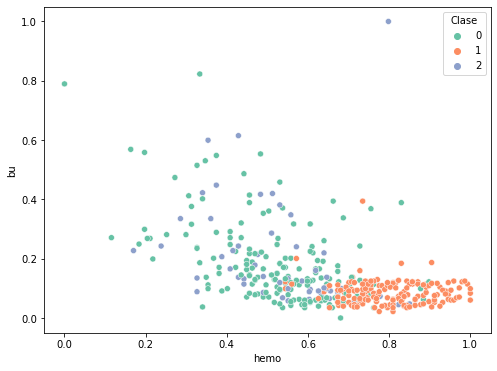

In [94]:
plt.figure(figsize = (8, 6))

sns.scatterplot(x = df["hemo"], y = df["bu"],
                hue = df["Clase"], palette = "Set2")
plt.show()

In [99]:
df_y= pd.read_csv("/Users/victoriaromerorodriguez/Desktop/BOOTCAMP/MACHINE LEARNING/CLUSTERING/KMEANS/ckd_limpio.csv")
y= df_y["class"]

In [104]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score

print(accuracy_score(y, yhat1),adjusted_rand_score(y,yhat1))
print(accuracy_score(y, yhat2),adjusted_rand_score(y,yhat2))

0.945 0.7912024846652868
0.805 0.5561202669060719
